<a href="https://colab.research.google.com/github/Prathyunala/google-colab/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [5]:
path="/content/OrdersandDeliveries.csv"
df=pd.read_csv(path)

In [6]:
df.head()

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders
0,Afghanistan,Ariana Afghan Airlines,1968,PW,727,Mar,1968,Central Asia,1,1,NaN
1,Afghanistan,Ariana Afghan Airlines,1970,PW,727,Apr,1969,Central Asia,1,1,NaN
2,Afghanistan,Ariana Afghan Airlines,1979,GE,DC-10,Sep,1978,Central Asia,1,1,NaN
3,Afghanistan,Ariana Afghan Airlines,NaN,CF,737-700,Nov,2005,Central Asia,0,4,NaN
4,Algeria,Air Algerie,1974,PW,727,Jan,1974,Africa,1,1,NaN


In [7]:
df = df.drop(['Unfilled Orders'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073 entries, 0 to 9072
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country         9073 non-null   object
 1   Customer Name   9073 non-null   object
 2   Delivery Year   8048 non-null   object
 3   Engine          9073 non-null   object
 4   Model Series    9073 non-null   object
 5   Order Month     9073 non-null   object
 6   Order Year      9073 non-null   object
 7   Region          9047 non-null   object
 8   Delivery Total  9073 non-null   object
 9   Order Total     9073 non-null   object
dtypes: object(10)
memory usage: 709.0+ KB


In [8]:
df_new = df.dropna()

In [9]:
df.replace(',','', regex=True, inplace=True)

In [10]:
df['Order Total'] = pd.to_numeric(df['Order Total'])
df['Delivery Total'] = pd.to_numeric(df['Delivery Total'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073 entries, 0 to 9072
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country         9073 non-null   object
 1   Customer Name   9073 non-null   object
 2   Delivery Year   8048 non-null   object
 3   Engine          9073 non-null   object
 4   Model Series    9073 non-null   object
 5   Order Month     9073 non-null   object
 6   Order Year      9073 non-null   object
 7   Region          9047 non-null   object
 8   Delivery Total  9073 non-null   int64 
 9   Order Total     9073 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 709.0+ KB


<Axes: >

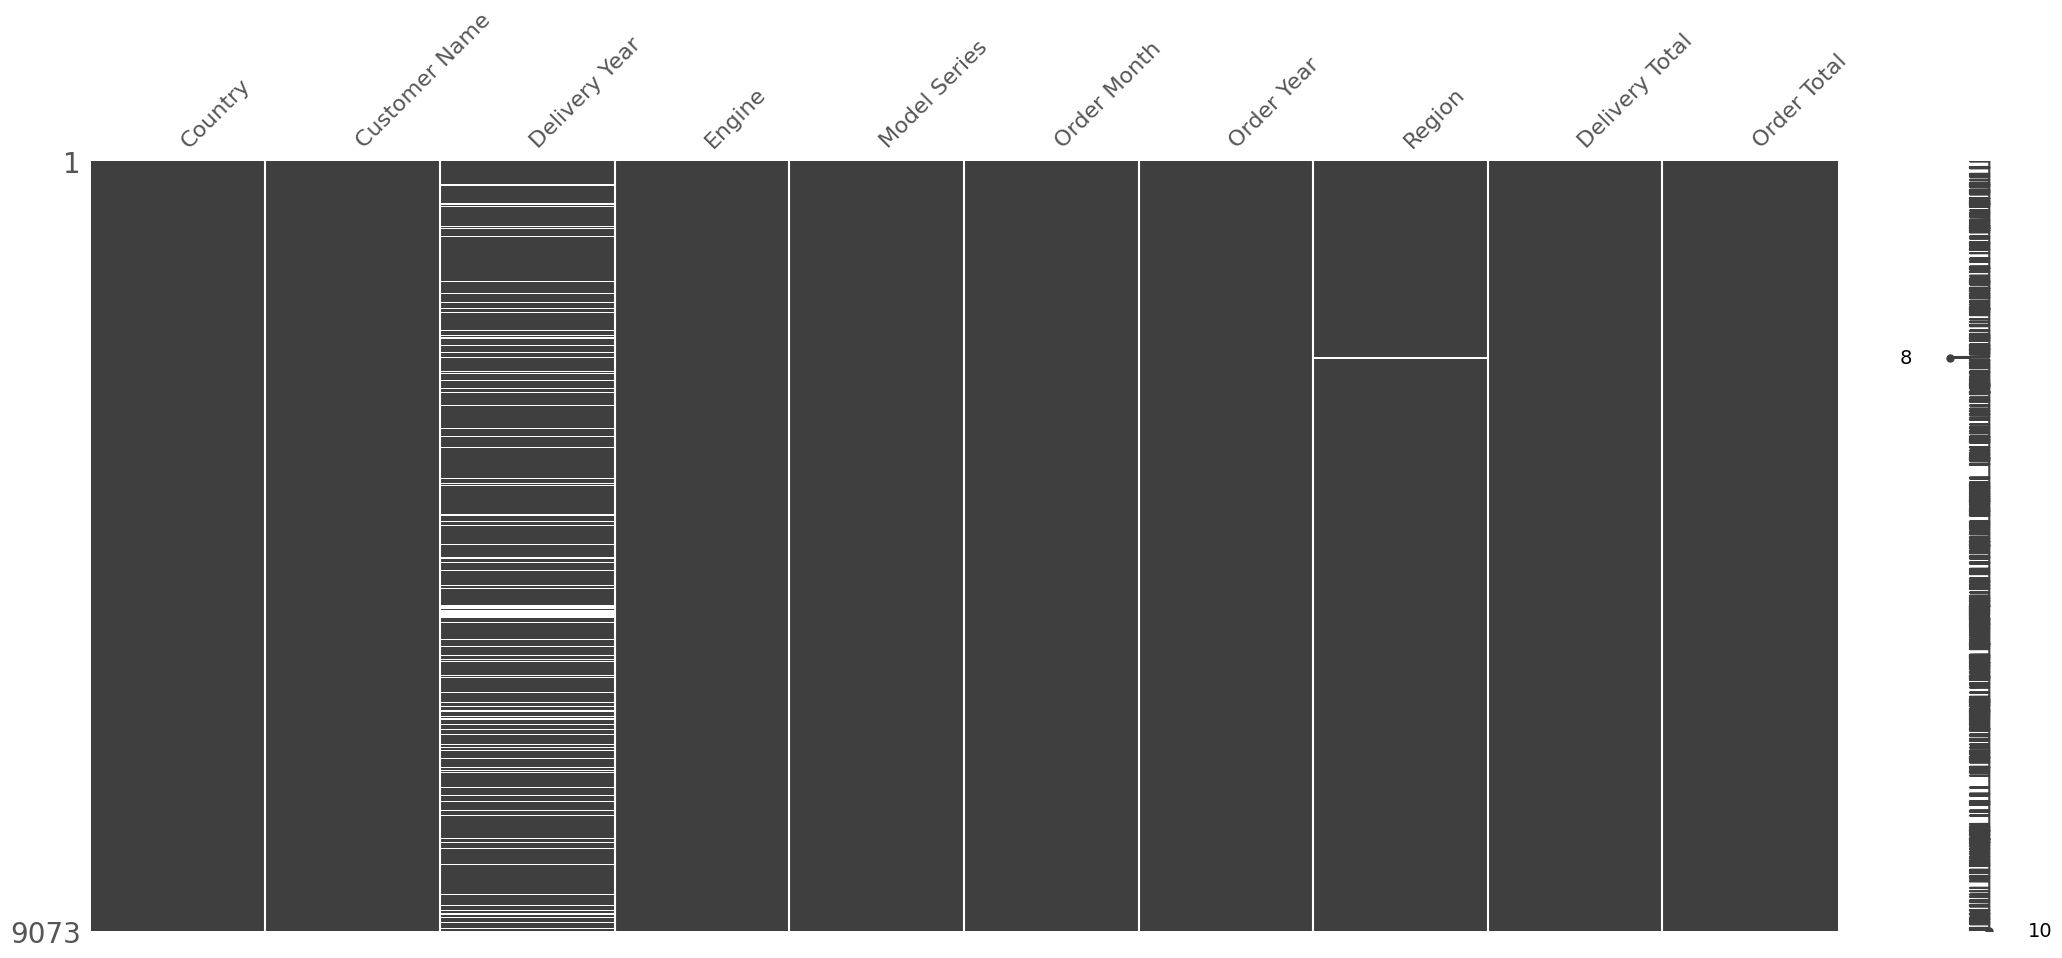

In [12]:
import missingno as msno
msno.matrix(df)

In [13]:
px.histogram(df, x='Engine',title='Frequency of engine type', text_auto='.2s')

In [14]:
fig = px.pie(df, names='Engine', title = 'Population of Engine type')
fig.show()

In [15]:
df['Model Series'].value_counts().iloc[:5]

737-800    1208
727         540
737-200     475
737 MAX     430
MD-80       416
Name: Model Series, dtype: int64

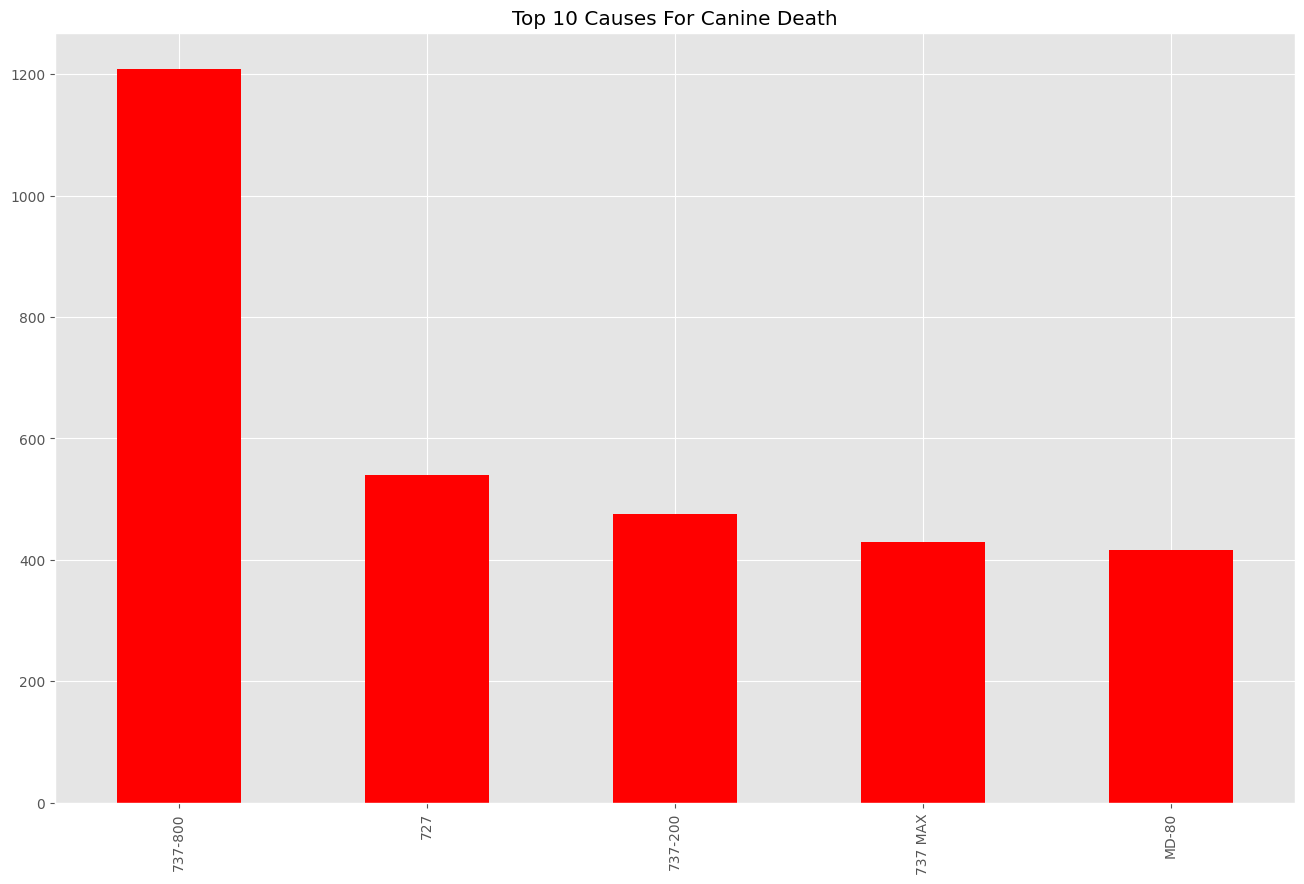

In [16]:
plt.figure(figsize=(16,10))
ax = df['Model Series'].value_counts().iloc[:5].plot(kind="bar", color = 'red')
ax.title.set_text('Top 10 Causes For Canine Death')

In [17]:
px.histogram(df, x='Region', color="Engine" ,title='Frequency of Region')

In [18]:
fig = px.pie(df, names='Region', title = 'Population of Region')
fig.show()

Text(0.5, 58.7222222222222, 'Date')

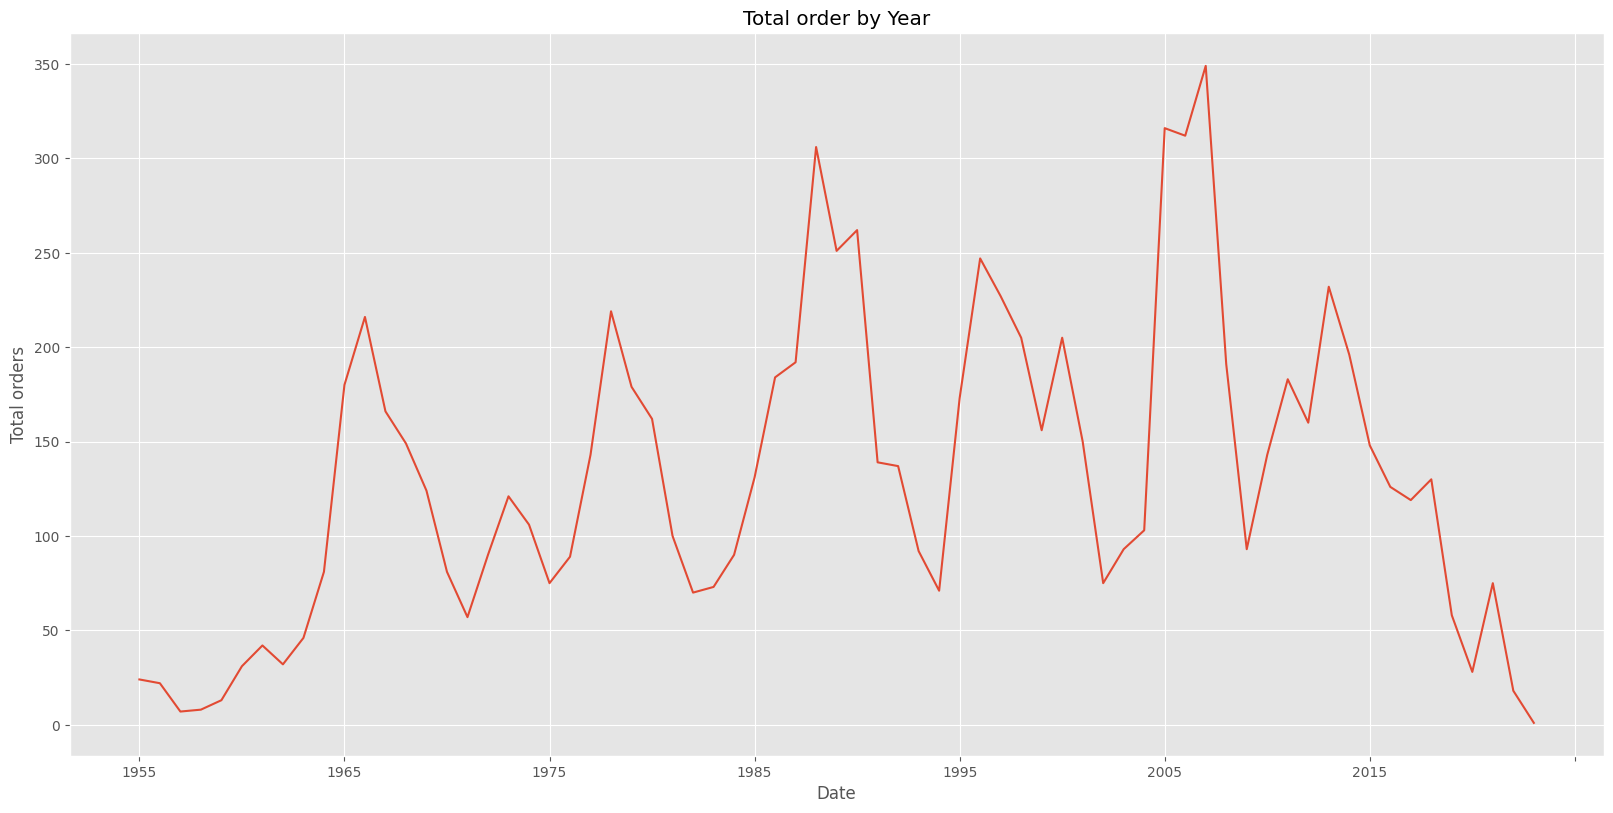

In [19]:
plt.figure(figsize=(16,8))
df.groupby('Order Year').count()['Order Total'].plot()
plt.tight_layout()
plt.title('Total order by Year')
plt.ylabel("Total orders")
plt.xlabel("Date")

Text(0.5, 58.7222222222222, 'Date')

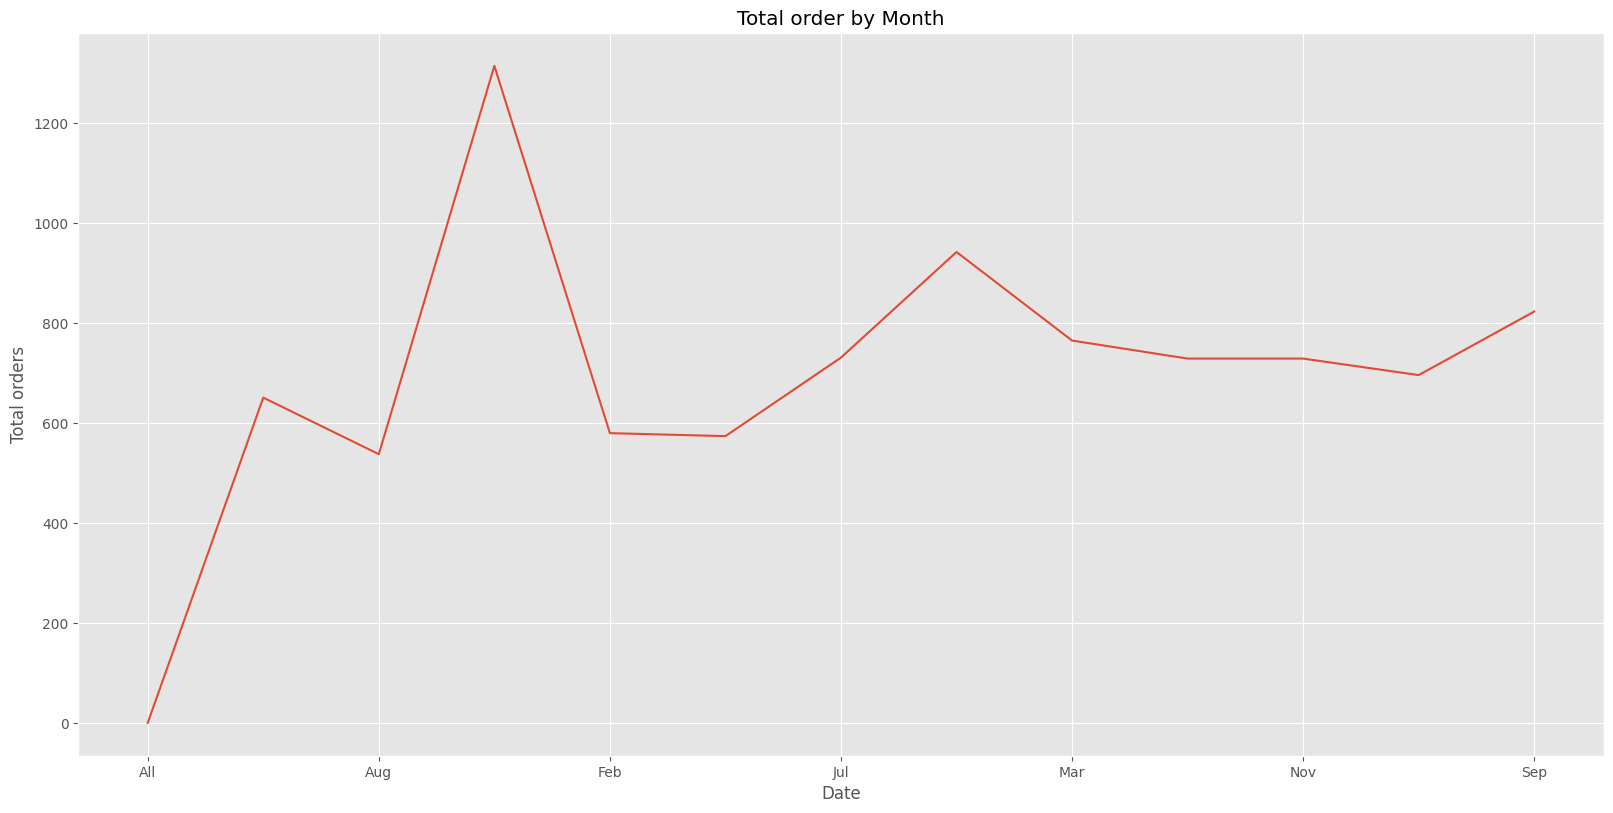

In [20]:
plt.figure(figsize=(16,8))
df.groupby('Order Month').count()['Order Total'].plot()
plt.tight_layout()
plt.title('Total order by Month')
plt.ylabel("Total orders")
plt.xlabel("Date")

In [21]:
yearcount = df.groupby('Order Year').count()
yearcount.head()

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Region,Delivery Total,Order Total
Order Year,,,,,,,,,
1955,24,24,24,24,24,24,24,24,24
1956,22,22,21,22,22,22,22,22,22
1957,7,7,7,7,7,7,7,7,7
1958,8,8,8,8,8,8,8,8,8
1959,13,13,13,13,13,13,13,13,13


In [22]:
monthcount = df.groupby('Order Month').count()
monthcount.head()

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Year,Region,Delivery Total,Order Total
Order Month,,,,,,,,,
All,1,1,1,1,1,1,1,1,1
Apr,651,651,585,651,651,651,647,651,651
Aug,538,538,468,538,538,538,535,538,538
Dec,1314,1314,1160,1314,1314,1314,1311,1314,1314
Feb,580,580,521,580,580,580,579,580,580


In [23]:
fig = px.line(yearcount, x=yearcount.index, y='Order Total', title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [24]:
fig = px.line(monthcount, x=monthcount.index, y='Order Total', title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [25]:
OrderMonthYear = df.groupby(by=['Order Year','Order Month']).sum()['Order Total'].unstack()
OrderMonthYear.head()
orderdate = OrderMonthYear.loc['2000':'2018']
orderdate.drop('All', axis=1)

Order Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Order Year,,,,,,,,,,,,
2000,4.0,43.0,29.0,11.0,6.0,16.0,139.0,111.0,57.0,84.0,28.0,92.0
2001,20.0,10.0,41.0,17.0,48.0,12.0,11.0,51.0,33.0,25.0,37.0,30.0
2002,33.0,13.0,31.0,2.0,104.0,2.0,8.0,14.0,5.0,27.0,9.0,3.0
2003,1.0,7.0,21.0,4.0,23.0,36.0,73.0,5.0,2.0,44.0,16.0,8.0
2004,2.0,20.0,61.0,4.0,12.0,75.0,14.0,20.0,30.0,19.0,1.0,19.0
2005,14.0,90.0,204.0,32.0,20.0,88.0,162.0,11.0,200.0,148.0,36.0,24.0
2006,149.0,30.0,210.0,25.0,39.0,38.0,129.0,112.0,33.0,58.0,52.0,175.0
2007,136.0,75.0,287.0,57.0,13.0,147.0,132.0,119.0,92.0,177.0,56.0,132.0
2008,58.0,38.0,23.0,125.0,65.0,70.0,62.0,99.0,67.0,7.0,14.0,41.0


<Figure size 1200x800 with 0 Axes>

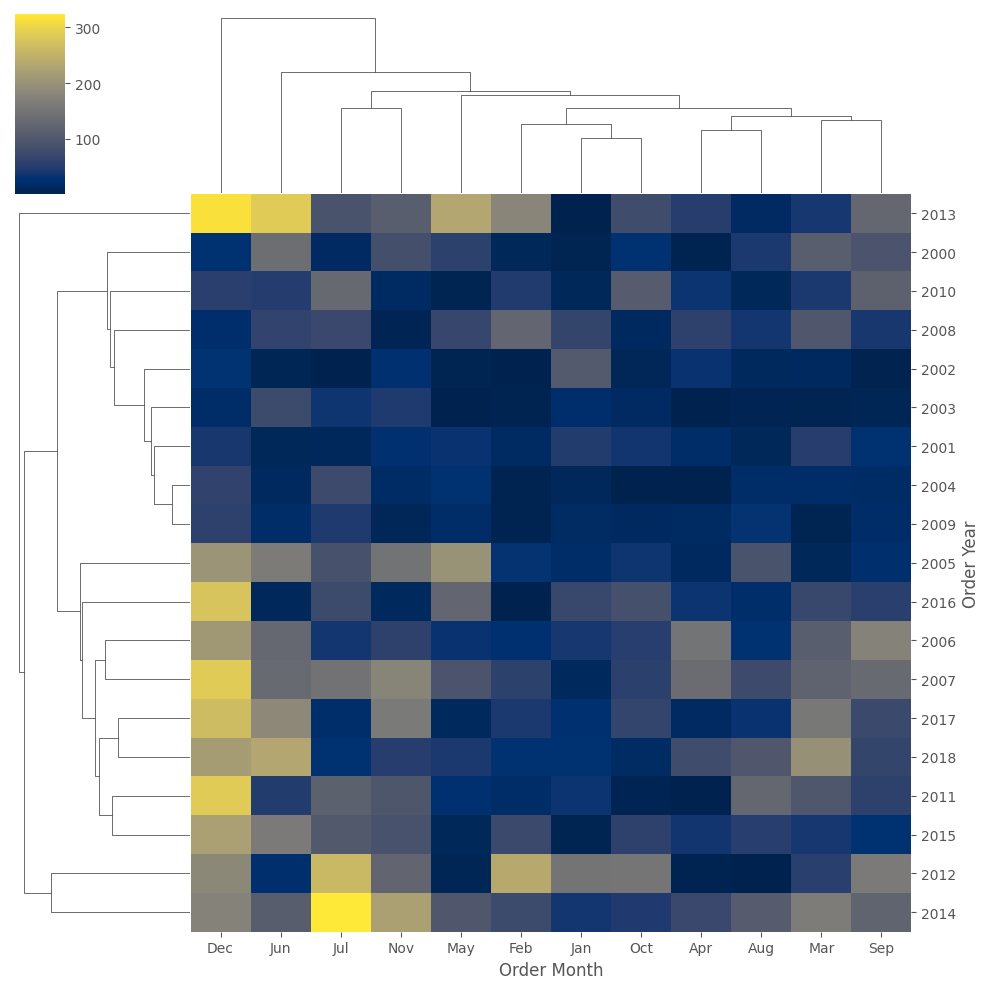

In [26]:
plt.figure(figsize=(12,8))
sns.clustermap(orderdate.drop('All', axis=1),cmap='cividis')

In [27]:
year_country = df.groupby('Order Year')['Country'].value_counts().reset_index(name='Order Total')

fig = px.choropleth(year_country, locations="Country", color="Order Total",
                    locationmode='country names',
                    animation_frame='Order Year',
                    range_color=[10,200],
                    color_continuous_scale=px.colors.sequential.Plasma
                   )

fig.update_layout(title='Orders by Country')
fig.show()


Conclusion:

Data-driven aircraft production and delivery improve Boeing's decisions. Python, Pandas, Matplotlib preprocessed, EDA, and predicted. Structured data, historical trend visualization, and accurate order and delivery forecasting.

Even when successful, project implementation was hard. Lack of data and regularity hampered preprocessing. Complex aerospace manufacturing data solved unexpected problems. Allocating resources and optimizing machine learning models for accurate predictions was difficult.

Unexpected issues necessitated data cleaning and validation for future projects Aerospace manufacturing data requires expert collaboration.



Clean and quality data should come next. IPM feedback boosts accuracy. Collaboration is needed for data complexity and actionable insights in aerospace manufacturing.



Optimizing aerospace manufacturing data. Problems and successes help future projects make decisions and manage complexity.